## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

* Regression is when the outcome variable y is numeric, whereas classification is occuring when the outcome variable y is categorical.
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
* During classification tasks, the metric used to test if a model "worked" would be a confusion matrix.  A cross-tabulate the true labels with the predicted ones, and see if they align or not.
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
* Accuracy represents what proportion of the cases were predicted correctly and accordingly. It may not always be the best because when classes are imbalanced. For example, if most cases belong to one class, a model can have high accuracy by always predicting that class, even if it performs poorly on the other class. Therefore, not fully reflecting the model's performance.
4. What does the root mean squared error quantify about a particular model?
* Root mean squared error shows how far the model's predictions are from the actual values on average. Lower RMSE means the model is more accurate, while higher RMSE means it makes larger errors.
5. What are overfitting and underfitting?
* When a k is too low, the model is overly sensitive to a handful of data points; this is overfitting. When a k is too high, the model averages over many observations and will give answers close to population proportions; this is underfitting.

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
* Splitting the data into training and testing sets helps make sure the model is evaluated on new data it has not seen before. This improves model performance by preventing overfitting and helping the model generalize better to new data.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

* Predicting a class label is simple because it gives one clear answer, but it does not show how confident the model is. Predicting probabilities shows how likely each class is, which gives more information, but it is less simple and requires choosing a cutoff to make a final conclusion.



**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).


```
# This is formatted as code
```


2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()


Download complete
Extracting data files...
Data extracted


Q2.1

In [35]:
df = pd.read_csv('./data/land_mines.csv')
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [36]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voltage    338 non-null    float64
 1   height     338 non-null    float64
 2   soil       338 non-null    float64
 3   mine_type  338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


(338, 4)

In [37]:
df["mine_type"].value_counts()


,count
mine_type,
1,71
2,70
3,66
4,66
5,65


In [38]:
df.describe()


,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


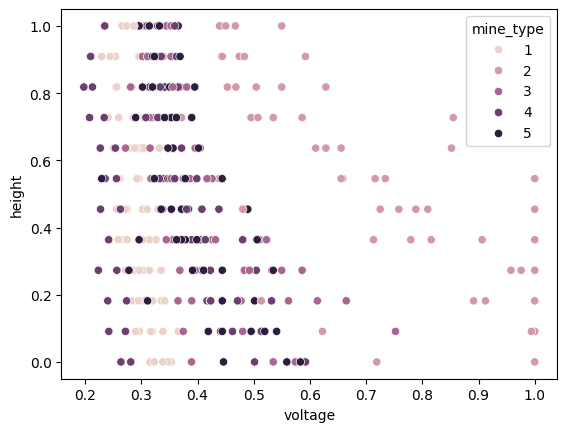

In [10]:
sns.scatterplot(data=df, x="voltage", y="height", hue="mine_type")
plt.show()


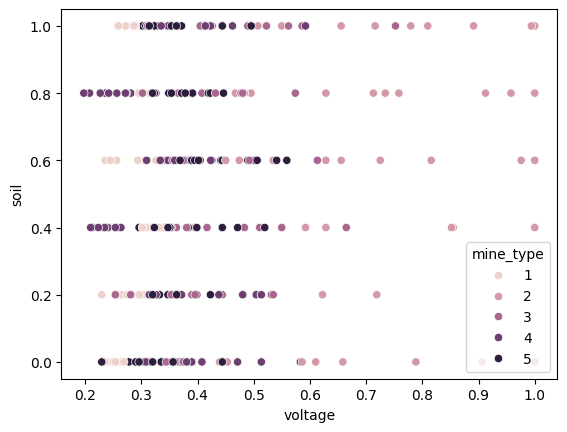

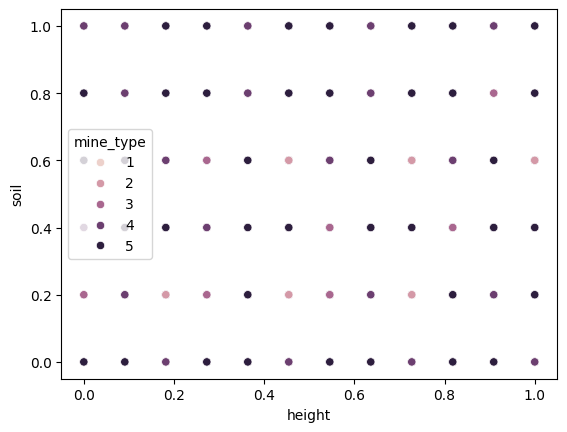

In [39]:
sns.scatterplot(data=df, x="voltage", y="soil", hue="mine_type")
plt.show()

sns.scatterplot(data=df, x="height", y="soil", hue="mine_type")
plt.show()


In [40]:
df["mine_type"].value_counts()
df["mine_type"].value_counts(normalize=True)


,proportion
mine_type,
1,0.210059
2,0.207101
3,0.195266
4,0.195266
5,0.192308


The distribution of mine types looks balanced, with each class having a similar number of observations, which is helpful because the model is less likely to favor one class over the others. The scatterplots show limited clustering and a noticeable amount of overlap between mine types, meaning mines with similar feature values can belong to different categories. Because of this overlap, the k-NN model may have a harder time clearly separating and correctly classifying some mine types.

Q2.2

In [41]:
X = df[["voltage", "height", "soil"]]
y = df["mine_type"]


In [42]:
from sklearn.model_selection import train_test_split

u = df[["voltage", "height", "soil"]]
y = df["mine_type"]

u_train, u_test, y_train, y_test = train_test_split(
    u, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)




Q2.3

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score




In [62]:
from sklearn.model_selection import train_test_split

u = df[["voltage", "height", "soil"]]
y = df["mine_type"]
u_train, u_test, y_train, y_test = train_test_split(
    u, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(u_train, y_train)


KNeighborsClassifier()

In [47]:
y_hat = knn.predict(u_test)

In [48]:
accuracy_score(y_test, y_hat)


0.3136094674556213

In [55]:
k_list = [1,3,5,7,9,11,13,15]
accuracy_list = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(u_train, y_train)

    y_hat = knn.predict(u_test)
    acc = accuracy_score(y_test, y_hat)

    accuracy_list.append(acc)

accuracy_list


[0.40236686390532544,
 0.378698224852071,
 0.3136094674556213,
 0.3136094674556213,
 0.34911242603550297,
 0.35502958579881655,
 0.34911242603550297,
 0.33136094674556216]

In [57]:
best_k = k_list[accuracy_list.index(max(accuracy_list))]
best_k


1

In [58]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(u_train, y_train)

y_hat = knn.predict(u_test)


A k-nearest neighbors classifier was built to predict mine type using voltage, height, and soil variables. the value of k that produced the highest accuracy was selcted as the final model model because it provided a balance between both sensitive and general predictions of k.

Q2.4

In [68]:

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model.fit(u_train, y_train)

y_hat = model.predict(u_test)

pd.crosstab(y_test, y_hat)

print("Accuracy:", model.score(u_test, y_test))



Accuracy: 0.3136094674556213


In [69]:
y_hat = model.predict(u_test)

confusion = pd.crosstab(y_test, y_hat)

print(confusion)

accuracy = model.score(u_test, y_test)

print("Accuracy:", accuracy)


col_0       1   2   3  4  5
mine_type                  
1          16   0  10  7  3
2           1  24   3  4  3
3           9   3   5  8  8
4          10   5  10  4  4
5           7   1  11  9  4
Accuracy: 0.3136094674556213


The confusion matrix compares the true mine types with the predicted mine types from the model. The diagonal values represent correct predictions, while the off-diagonal values represent incorrect predictions. My accuracy number was .313, this means the model predicts right the mine types about 300% of the time. The confusion matrix shows that some mine types are predicted more accurately than others. That being said, those mine types with similar feature values are more likely to be confused with each other and can lead to errors, wehreas those with differences in variables tend to be classified correctly normally.

Q2.5

Even though the model has pretty high accuracy, it still makes mistakes, which is dangerous when dealing with land mines. Because of this, the model should be used as a tool to help guide decisions, not something people rely on completely.

It can help suggest the most likely mine type, but trained professionals should still double-check and follow proper safety procedures. Overall, the model is useful for support, but human judgment and caution are still necessary.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

3.1

In [75]:
df = pd.read_csv('./data/USA_cars_datasets.csv')
df = df[["price", "year", "mileage"]]
df.head()


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [76]:
df.shape

(2499, 3)

In [77]:
df.isna().sum

<bound method DataFrame.sum of       price   year  mileage
0     False  False    False
1     False  False    False
2     False  False    False
3     False  False    False
4     False  False    False
...     ...    ...      ...
2494  False  False    False
2495  False  False    False
2496  False  False    False
2497  False  False    False
2498  False  False    False

[2499 rows x 3 columns]>

The dataset was loaded and only price, year, and mileage were kept. When looking for missing values, it showed that there were no missing values, so no NA handling was needed.

Q3.2

In [78]:

df['year_norm'] = (df['year'] - np.min(df['year'])) / (np.max(df['year']) - np.min(df['year']))

df['mileage_norm'] = (df['mileage'] - np.min(df['mileage'])) / (np.max(df['mileage']) - np.min(df['mileage']))

df.head()


,price,year,mileage,year_norm,mileage_norm
0,6300,2008,274117,0.744681,0.269287
1,2899,2011,190552,0.808511,0.187194
2,5350,2018,39590,0.957447,0.038892
3,25000,2014,64146,0.872340,0.063016
4,27700,2018,6654,0.957447,0.006537


Q3.3

In [80]:
from sklearn.model_selection import train_test_split

u = df[['year_norm','mileage_norm']]
y = df['price']

u_train, u_test, y_train, y_test = train_test_split(
    u, y,
    test_size = .2,
    random_state = 100
)


k = 3
MSE = 126446573.21822222


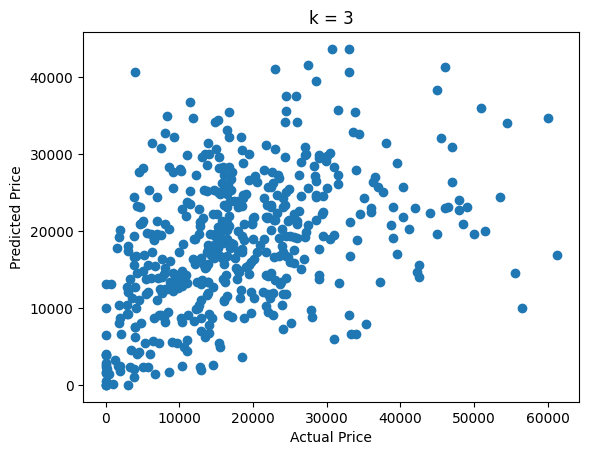

k = 10
MSE = 110802185.58681999


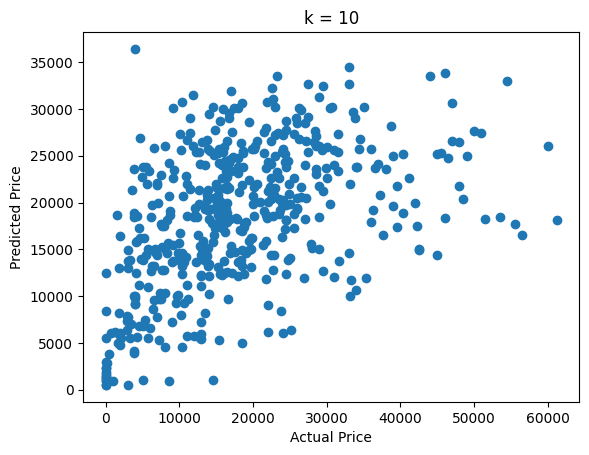

k = 25
MSE = 103170457.848608


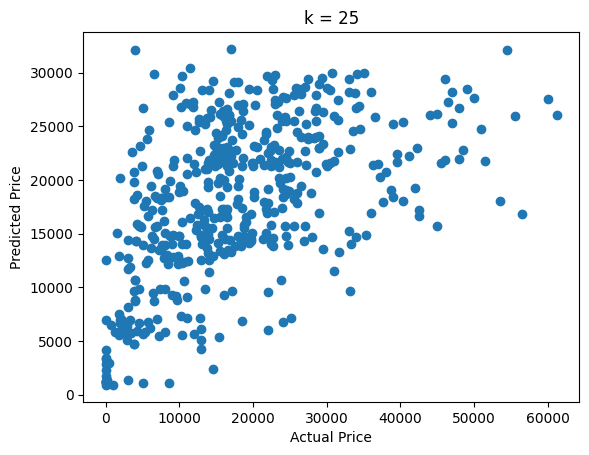

k = 50
MSE = 99695443.96419598


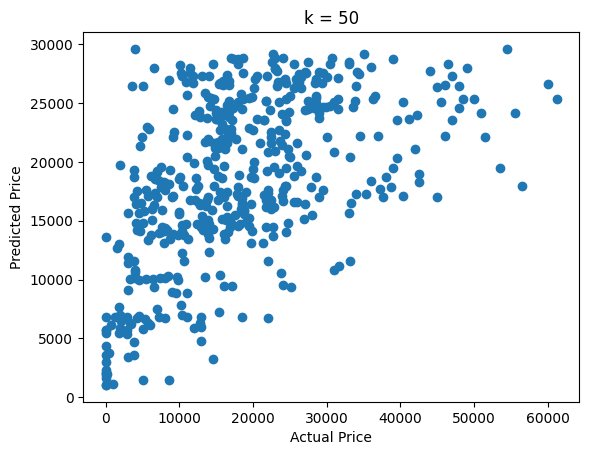

k = 100
MSE = 98271058.96092059


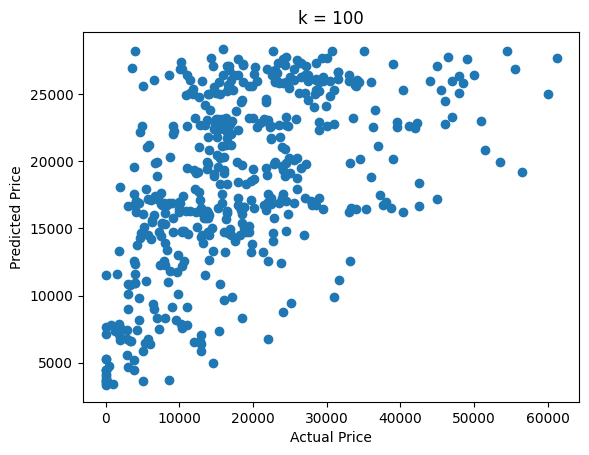

k = 300
MSE = 100477298.914212


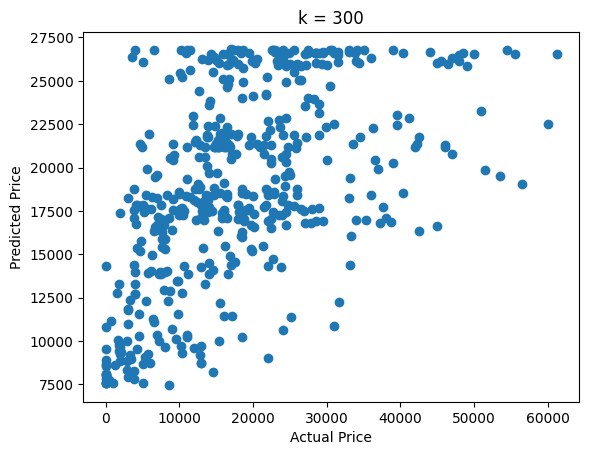

In [81]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [3,10,25,50,100,300]

mse_values = []

for k in k_values:

    model = KNeighborsRegressor(n_neighbors=k)

    model.fit(u_train, y_train)

    y_hat = model.predict(u_test)

    mse = np.mean((y_test - y_hat)**2)

    mse_values.append(mse)

    print("k =", k)
    print("MSE =", mse)

    plt.scatter(y_test, y_hat)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('k = ' + str(k))
    plt.show()


3.5

In [82]:
k_optimal = k_values[np.argmin(mse_values)]

print("Optimal k =", k_optimal)

Optimal k = 100


The optimal k is the value that gives the lowest mean squared error, since this means the predictions are closest to the actual prices.

3.6
The optimal k is 100 because it has the lowest mean squared error, meaning it gives the most accurate predictions. When k is small, like with k=3, the model was overfitting and the predictions were less stable. As k increased, the predictions improved. When k became too large, like k=300, the model began underfitting and the error increased.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

Q4.1

In [84]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/heart_failure_clinical_records_dataset.csv")

df.head()
df.shape
df.isna().sum()

df = df.drop(columns=["time"])

df.head()
df.shape


(299, 12)

Q4.2

In [85]:
corr = df.corr(numeric_only=True)
corr_with_death = corr["DEATH_EVENT"].sort_values(ascending=False)
corr_with_death


,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.294278
age,0.253729
high_blood_pressure,0.079351
anaemia,0.066270
creatinine_phosphokinase,0.062728
diabetes,-0.001943
sex,-0.004316
smoking,-0.012623
platelets,-0.049139


The correlation table shows which variables move most strongly with DEATH_EVENT. Variables with the largest absolute correlations are the most strongly connected.

Q4.3

In [86]:
dummy_vars = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

for v in dummy_vars:
    tab = df.groupby(v)["DEATH_EVENT"].mean()
    counts = df.groupby(v)["DEATH_EVENT"].size()
    out = pd.DataFrame({"death_rate": tab, "n": counts})
    print("\n", v)
    print(out)



 anaemia
         death_rate    n
anaemia                 
0          0.294118  170
1          0.356589  129

 diabetes
          death_rate    n
diabetes                 
0           0.321839  174
1           0.320000  125

 high_blood_pressure
                     death_rate    n
high_blood_pressure                 
0                      0.293814  194
1                      0.371429  105

 sex
     death_rate    n
sex                 
0      0.323810  105
1      0.319588  194

 smoking
         death_rate    n
smoking                 
0          0.325123  203
1          0.312500   96


For each variable, compare the death_rate when value = 1 or death_rate when value = 0. If death_rate is higher at 1, then a larger proportion die when the variable is 1 pr closer to it.

Q4.4

In [87]:
y = df["DEATH_EVENT"]

chosen_vars = [
    "age",
    "ejection_fraction",
    "serum_creatinine",
    "anaemia",
    "high_blood_pressure"
]

X = df[chosen_vars]

X.head()


,age,ejection_fraction,serum_creatinine,anaemia,high_blood_pressure
0,75.0,20,1.9,0,1
1,55.0,38,1.1,0,0
2,65.0,20,1.3,0,0
3,50.0,20,1.9,1,0
4,65.0,20,2.7,1,0


Q4.5

In [88]:
X_norm = (X - X.min()) / (X.max() - X.min())
X_norm.head()


,age,ejection_fraction,serum_creatinine,anaemia,high_blood_pressure
0,0.636364,0.090909,0.157303,0.0,1.0
1,0.272727,0.363636,0.067416,0.0,0.0
2,0.454545,0.090909,0.089888,0.0,0.0
3,0.181818,0.090909,0.157303,1.0,0.0
4,0.454545,0.090909,0.247191,1.0,0.0


4.6

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y,
    test_size=0.2,
    random_state=100
)


Q4.7

In [91]:
from sklearn.neighbors import KNeighborsRegressor

k_grid = [3, 10, 25, 50, 100,]

mse_values = []
rmse_values = []

for k in k_grid:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_hat = model.predict(X_test)

    mse = np.mean((y_test - y_hat)**2)
    rmse = np.sqrt(mse)

    mse_values.append(mse)
    rmse_values.append(rmse)

    print("k =", k, "| MSE =", mse, "| RMSE =", rmse)

k_optimal = k_grid[np.argmin(mse_values)]
print("\nOptimal k =", k_optimal)
print("Best RMSE =", min(rmse_values))



k = 3 | MSE = 0.22592592592592595 | RMSE = 0.47531665858238753
k = 10 | MSE = 0.2135 | RMSE = 0.46206060208591687
k = 25 | MSE = 0.22026666666666667 | RMSE = 0.4693257575146144
k = 50 | MSE = 0.2182266666666667 | RMSE = 0.46714737146500857
k = 100 | MSE = 0.218525 | RMSE = 0.4674665763453041

Optimal k = 10
Best RMSE = 0.46206060208591687


4.8

In [92]:
all_vars = [c for c in df.columns if c != "DEATH_EVENT"]

X_all = df[all_vars]
X_all_norm = (X_all - X_all.min()) / (X_all.max() - X_all.min())

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_all_norm, y,
    test_size=0.2,
    random_state=100
)

mse_values2 = []
rmse_values2 = []

for k in k_grid:
    model2 = KNeighborsRegressor(n_neighbors=k)
    model2.fit(X_train2, y_train2)

    y_hat2 = model2.predict(X_test2)

    mse2 = np.mean((y_test2 - y_hat2)**2)
    rmse2 = np.sqrt(mse2)

    mse_values2.append(mse2)
    rmse_values2.append(rmse2)

    print("ALL VARS | k =", k, "| MSE =", mse2, "| RMSE =", rmse2)

k_optimal2 = k_grid[np.argmin(mse_values2)]
print("\nALL VARS Optimal k =", k_optimal2)
print("ALL VARS Best RMSE =", min(rmse_values2))


ALL VARS | k = 3 | MSE = 0.28703703703703703 | RMSE = 0.5357583756107197
ALL VARS | k = 10 | MSE = 0.212 | RMSE = 0.4604345773288535
ALL VARS | k = 25 | MSE = 0.20394666666666666 | RMSE = 0.45160454677368633
ALL VARS | k = 50 | MSE = 0.22352000000000002 | RMSE = 0.4727790181469563
ALL VARS | k = 100 | MSE = 0.22247666666666668 | RMSE = 0.47167432267049125

ALL VARS Optimal k = 25
ALL VARS Best RMSE = 0.45160454677368633


Additional variables aren't necessarily always better. They can help if they help provide more information, but also can overcomplicate/hurt performance and create k-NN distances to be less meaningful.

The overall best RMSE was .4516 at K=25 and the selected variable model had a best RMSE of .4621 at K=10.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)